In [1]:
from gflownet.algo.config import TBVariant
from gflownet.config import Config,init_empty
import torch
import gc
from hyperparams_base_model import ScentTrainer

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.



############################################################
#                     Initialize MCFs                      #
############################################################

Filter                                        Min        Max
------------------------------------------------------------
LogP                                         0.06       4.91
Molecular Weight                           100.12     282.46
HBAB + HBD                                   0.00       5.00
TPSA                                         0.00      63.32
Rotatable Bonds                              0.00      11.00
NO2 Groups                                   0.00       0.00
Heteroatoms                                  0.00       4.00
Aromatic Rings                               0.00       1.00
Atom Count                                   0.00      20.00
Triple Bonds                                 0.00       0.00
Oxygen Chain Length                          0.00       1.00

#####################

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:


best_params = {
    # Fixed
    'algo_variant': 1, 
    'opt_momentum': 0.651294024078677,
    'opt_weight_decay': 3.9731330248837407e-07,

    # Learned
    'algo_sampling_tau': 0.9840271666819398,
    'algo_Z_learning_rate': 3.157262808970358e-05,
    'opt_learning_rate': 0.0002566028526773609,
    'opt_clip_grad_param': 32.27804232610293
    }

In [3]:
# Initialize default hyperprameters
config = init_empty(Config())

# For CPU
config.device = torch.device('cpu')
config.num_workers = 0
config.log_dir ="./logs/hyperbest2"
config.overwrite_existing_exp=True

config.validate_every=1000
config.algo.num_from_policy = 32
config.algo.num_from_dataset = 32
config.algo.valid_num_from_policy= 32
config.algo.valid_num_from_dataset= 32
config.num_training_steps = 400 #10_000
config.print_every =1
config.seed = 1


config.algo.tb.do_parameterize_p_b = False # Dont know how to load the model with this parameter = True
config.num_validation_gen_steps = 1
#config.overwrite_existing_exp=True
config.algo.tb.mask_invalid_rewards = False
config.algo.tb.std_cut_losses = False
config.algo.tb.std_cut_scale = 1


# OPTUNA PARAMETERS
# Algo
config.algo.tb.variant = best_params["algo_variant"]
config.algo.sampling_tau = best_params["algo_sampling_tau"]
config.algo.tb.Z_learning_rate = best_params["algo_Z_learning_rate"]
# Opt
config.opt.clip_grad_param = best_params["opt_clip_grad_param"]
config.opt.momentum = best_params["opt_momentum"]
config.opt.learning_rate = best_params["opt_learning_rate"]
config.opt.weight_decay = best_params["opt_weight_decay"]




gc.collect()
trainer = ScentTrainer(config, print_config=False)


trainer.run(logger=None)
gc.collect()
    
 

20/05/2025 10:59:29 - INFO - logger - Starting training
20/05/2025 10:59:35 - INFO - logger - iteration 1 : offline_loss:888.31 online_loss:2234.30 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-12.90 invalid_losses:2234.30 backward_vs_unif:0.00 logZ:0.21 loss:1561.30 n_loss:0.00 tb_loss:1561.30 batch_entropy:44.17 traj_lens:10.89 grad_norm:2414.85 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:3.00 time_spent:5.51
20/05/2025 10:59:41 - INFO - logger - iteration 2 : offline_loss:218.87 online_loss:2032.74 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-21.36 invalid_losses:2032.74 backward_vs_unif:0.00 logZ:-0.53 loss:1125.81 n_loss:0.00 tb_loss:1125.81 batch_entropy:34.80 traj_lens:11.05 grad_norm:783.20 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:2.90 time_spent:6.13
20/05/2025 10:59:46 - INFO - logger - iteration 3 : offline_loss:175.59 online_loss:1985.41 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-17.06 invalid_losses:1

98217

In [22]:
trainer.run(logger=None)

20/05/2025 13:18:52 - INFO - logger - Starting training
20/05/2025 13:19:07 - INFO - logger - iteration 1 : offline_loss:43940.70 online_loss:190.91 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-49.30 invalid_losses:229.25 backward_vs_unif:0.00 logZ:-6.11 loss:22065.81 n_loss:0.00 tb_loss:22065.81 batch_entropy:103.85 traj_lens:17.64 grad_norm:45985.10 grad_norm_clip:32.28 sampled_reward_avg:0.19 train_time:6.78 time_spent:14.44


KeyboardInterrupt: 

In [4]:
import pathlib

In [5]:
def save_run(trial):
    state = {
        "models_state_dict": [trial.model.state_dict()],
        "cfg": trial.cfg,
        "env_ctx": trial.model.env_ctx,
        #"model": trial.model,
    }
    if trial.sampling_model is not trial.model:
        state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]
    fn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"
    with open(fn, "wb") as fd:
        torch.save(
            state,
            fd,
        )


In [6]:
save_run(trainer)

In [7]:
from rdkit.Chem.Draw import MolsToGridImage, MolToImage

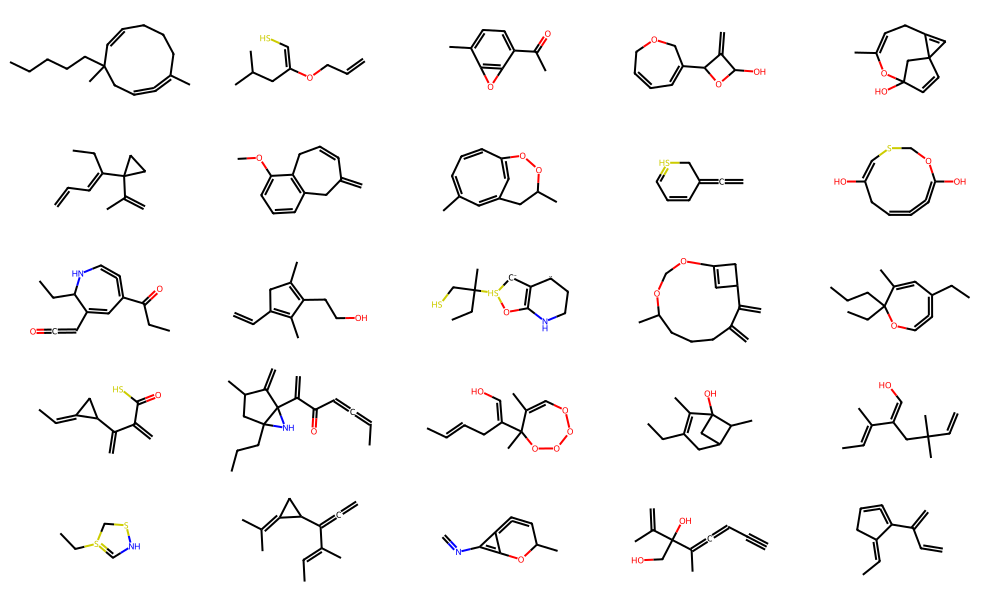

In [11]:
# Generate molecules
trajs = trainer.algo.create_training_data_from_own_samples(trainer.model, 25)
objs = [trainer.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trainer.task.compute_obj_properties(objs)
cond_info = trainer.task.sample_conditional_information(len(obj_props), 1)
log_rewards = trainer.task.cond_info_to_logreward(cond_info, obj_props)


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120))#, legends=[f'reward: {r.exp().item():.2f}' for r in log_rewards[:25]])

In [10]:
objs

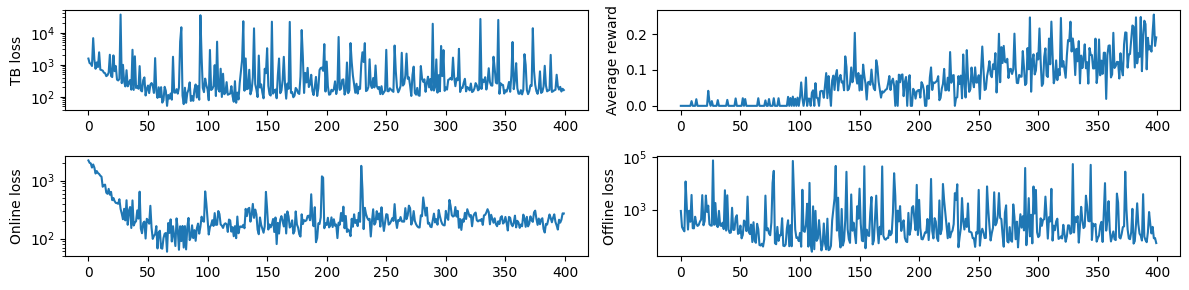

In [12]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator

cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(2, 2, figsize=(4*3,3))
ax[0,0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('TB loss')
ax[0,1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[0,1].set_ylabel('Average reward')
#ax[0,2].plot([i.value for i in ea.Scalars('train_logZ')])
#ax[0,2].set_ylabel('Predicted logZ')
ax[1,0].plot([i.value for i in ea.Scalars('train_online_loss')])
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Online loss')
ax[1,1].plot([i.value for i in ea.Scalars('train_offline_loss')])
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Offline loss')
#ax[2,0].plot([i.value for i in ea.Scalars('valid_online_loss')])
#ax[2,0].set_yscale('log')
#ax[2,0].set_ylabel('Validation online loss')
#ax[2,1].plot([i.value for i in ea.Scalars('valid_offline_loss')])
#ax[2,1].set_yscale('log')
#ax[2,1].set_ylabel('Validation offline loss')
pp.tight_layout()

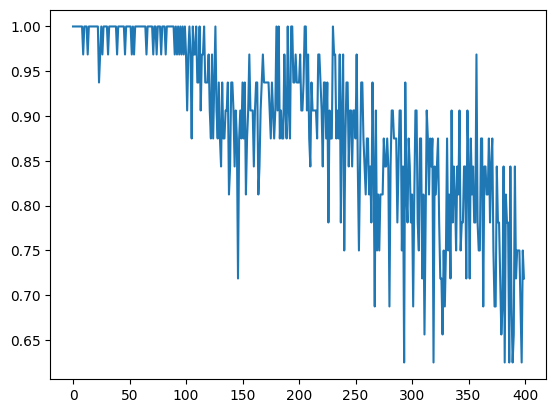

In [13]:
pp.plot([i.value for i in ea.Scalars('train_invalid_trajectories')])

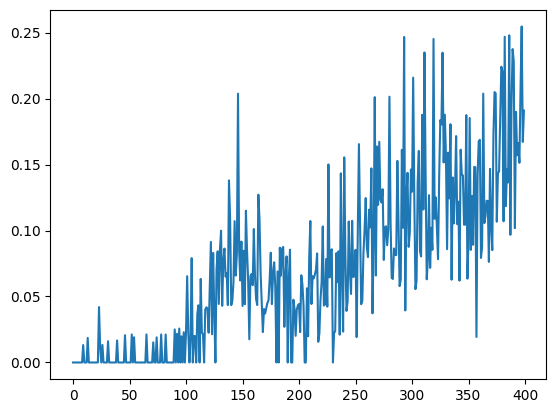

In [14]:
pp.plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])

In [15]:
import sqlite3
import pandas as pd
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
import numpy as np
from rdkit import Chem

In [16]:
log_dir = config.log_dir

In [17]:
conn = sqlite3.connect(f"{log_dir}/train/generated_objs_0.db")

In [18]:
df = pd.read_sql_query("SELECT * FROM results", conn)

In [19]:
top_rewards = df.sort_values(by='r', ascending=False).head(25)

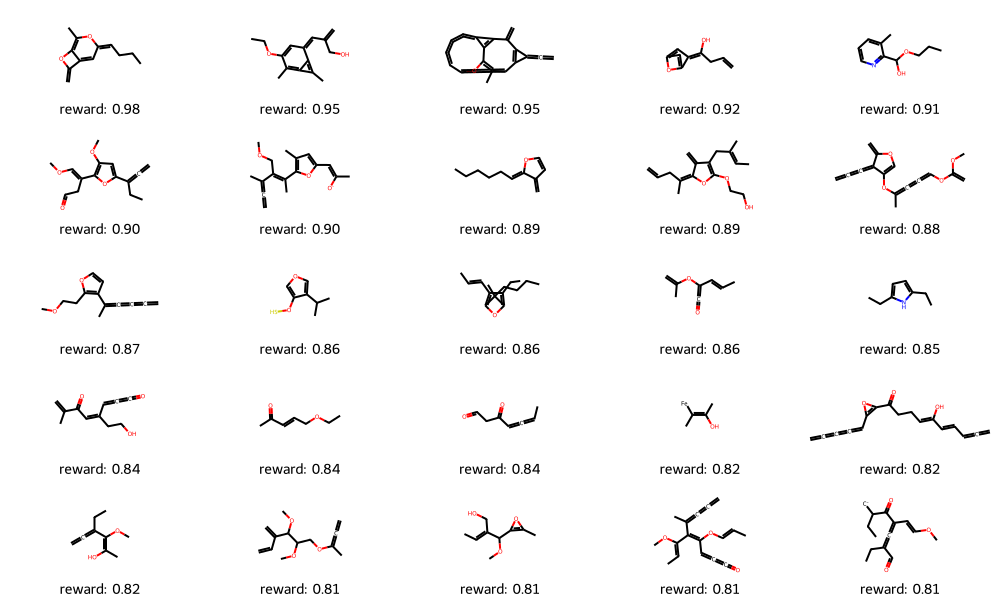

In [20]:
# Generate molecules
objs = [Chem.MolFromSmiles(smiles) for smiles in top_rewards["smi"]]
rewards = top_rewards["r"]


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards[:25]])

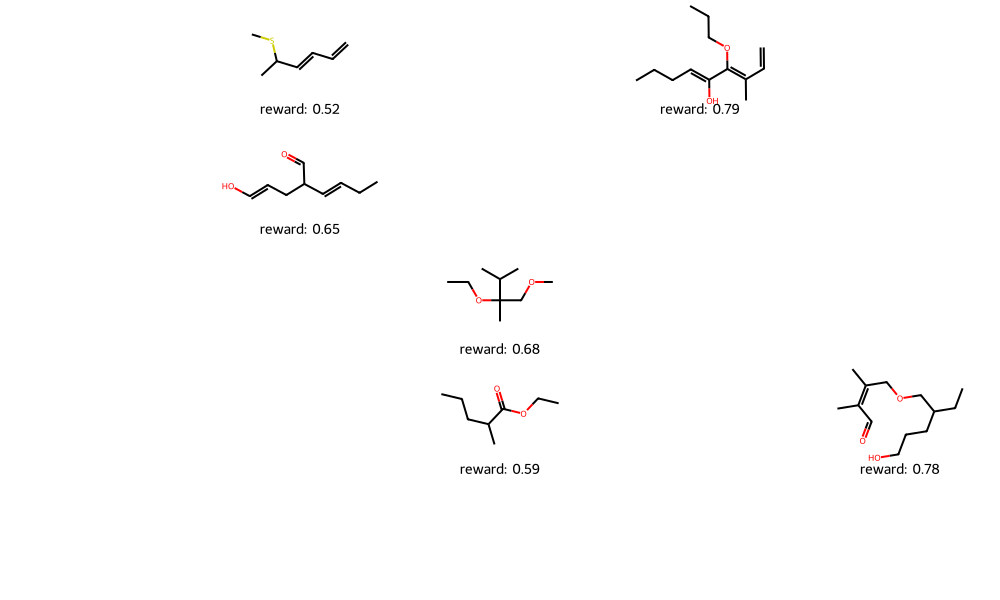

In [21]:
# Generate molecules

objs = [Chem.MolFromSmiles(smiles) for smiles in df[-32:]["smi"]]
rewards = df[-32:]["r"]


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards[:25]])

In [ ]:
# Utils
import warnings
import os

# Plotting
from rdkit.Chem.Draw import MolsToGridImage
import matplotlib.pyplot as plt
import seaborn as sns

# File management
import json
import numpy as np
import pandas as pd


# GFlowNET
import gflownet
from gflownet.algo.trajectory_balance import TrajectoryBalance
from gflownet.envs.graph_building_env import GraphBuildingEnv
from gflownet.config import init_empty, Config

# OpenPOM
from pom_models.functions import fragance_propabilities_from_smiles_test, fragance_propabilities_from_smiles_train

# Others
from tensorboard.backend.event_processing import event_accumulator
import torch
from rdkit import Chem

In [ ]:
# Model class must be defined somewhere
state = torch.load(os.path.join(log_dir, "model_final_save.pt"), weights_only=False)
#model = statemodel.eval()
#state["models_state_dict"]
config = state["cfg"]
env_ctx = state["env_ctx"]

In [ ]:
model = gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
model.load_state_dict(state["models_state_dict"][0])
model.eval()

In [ ]:
algo = TrajectoryBalance(GraphBuildingEnv(),state["env_ctx"],state["cfg"])

In [ ]:
from gflownet.envs.mol_building_env import MolBuildingEnvContext

In [ ]:
ctx = MolBuildingEnvContext(
            ['Br', 'C', 'Cl', 'F', 'Fe', 'N', 'Na', 'O', 'S'],
            #["C", "N", "F", "O"],
            #charges=[0],  # disable charge
            chiral_types=[Chem.rdchem.ChiralType.CHI_UNSPECIFIED],  # disable chirality
            expl_H_range=[0,1],
            num_cond_dim=1,
            max_nodes=20,
        )

In [ ]:
# Generate molecules
trajs = algo.create_training_data_from_own_samples(model, 25)
objs = [ctx.graph_to_obj(i['result']) for i in trajs]

In [ ]:
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120))